In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
import tensorflow as tf
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../Resources/diabetes_health_data.csv')
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
# Split our preprocessed data into our features and target arrays
y = df["Diabetes_012"].values
X = df.drop(columns="Diabetes_012").values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [4]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 120
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 30
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 120)               2640      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                6050      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1530      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 10,251
Trainable params: 10,251
Non-trainable params: 0
_________________________________________________________________


In [6]:
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
fit_model = nn.fit(X_train_scaled,y_train, batch_size=32, epochs=200, callbacks=[callback], validation_split=0.2)

Epoch 1/200
4757/4757 [==============================] - 23s 5ms/step - loss: -5.1457 - accuracy: 0.7177 - val_loss: -28.0134 - val_accuracy: 0.7088
Epoch 2/200
4757/4757 [==============================] - 22s 5ms/step - loss: -223.7749 - accuracy: 0.7068 - val_loss: -506.9485 - val_accuracy: 0.7805
Epoch 3/200
4757/4757 [==============================] - 18s 4ms/step - loss: -1500.1940 - accuracy: 0.6770 - val_loss: -2295.1472 - val_accuracy: 0.7580
Epoch 4/200
4757/4757 [==============================] - 21s 4ms/step - loss: -5171.4048 - accuracy: 0.6620 - val_loss: -6655.5444 - val_accuracy: 0.0325
Epoch 5/200
4757/4757 [==============================] - 22s 5ms/step - loss: -13052.7246 - accuracy: 0.6560 - val_loss: -15567.0146 - val_accuracy: 0.7498
Epoch 6/200
4757/4757 [==============================] - 22s 5ms/step - loss: -27259.1484 - accuracy: 0.6549 - val_loss: -27321.7539 - val_accuracy: 0.6779
Epoch 7/200
4757/4757 [==============================] - 23s 5ms/step - loss: -

Epoch 52/200
4757/4757 [==============================] - 22s 5ms/step - loss: -135355632.0000 - accuracy: 0.6556 - val_loss: -108693016.0000 - val_accuracy: 0.7499
Epoch 53/200
4757/4757 [==============================] - 22s 5ms/step - loss: -145966704.0000 - accuracy: 0.6547 - val_loss: -116761080.0000 - val_accuracy: 0.7547
Epoch 54/200
4757/4757 [==============================] - 21s 4ms/step - loss: -157107152.0000 - accuracy: 0.6551 - val_loss: -125959888.0000 - val_accuracy: 0.2447
Epoch 55/200
4757/4757 [==============================] - 15s 3ms/step - loss: -168818624.0000 - accuracy: 0.6554 - val_loss: -134565840.0000 - val_accuracy: 0.7489
Epoch 56/200
4757/4757 [==============================] - 20s 4ms/step - loss: -181221680.0000 - accuracy: 0.6568 - val_loss: -145981216.0000 - val_accuracy: 0.4469
Epoch 57/200
4757/4757 [==============================] - 21s 4ms/step - loss: -194277888.0000 - accuracy: 0.6568 - val_loss: -154899152.0000 - val_accuracy: 0.7495
Epoch 58/2

4757/4757 [==============================] - 19s 4ms/step - loss: -8703343616.0000 - accuracy: 0.6570 - val_loss: -6755156480.0000 - val_accuracy: 0.7658
Epoch 150/200
4757/4757 [==============================] - 20s 4ms/step - loss: -8936606720.0000 - accuracy: 0.6586 - val_loss: -6927818752.0000 - val_accuracy: 0.7754
Epoch 151/200
4757/4757 [==============================] - 19s 4ms/step - loss: -9175931904.0000 - accuracy: 0.6573 - val_loss: -7107185664.0000 - val_accuracy: 0.7754
Epoch 152/200
4757/4757 [==============================] - 19s 4ms/step - loss: -9420588032.0000 - accuracy: 0.6576 - val_loss: -7294909952.0000 - val_accuracy: 0.7616
Epoch 153/200
4757/4757 [==============================] - 16s 3ms/step - loss: -9667831808.0000 - accuracy: 0.6577 - val_loss: -7488556032.0000 - val_accuracy: 0.5890
Epoch 154/200
4757/4757 [==============================] - 20s 4ms/step - loss: -9924633600.0000 - accuracy: 0.6578 - val_loss: -7712548864.0000 - val_accuracy: 0.7592
Epoch 

In [7]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1982/1982 - 1s - loss: -2.1164e+10 - accuracy: 0.7563
Loss: -21164089344.0, Accuracy: 0.7562755942344666


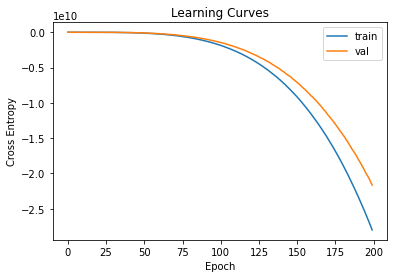

In [8]:
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(fit_model.history['loss'], label='train')
pyplot.plot(fit_model.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

## Attempt 2

In [9]:
df_modded = df.drop(columns=["Education", "Income"])
df_modded.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0


In [10]:
# Split our preprocessed data into our features and target arrays
y = df_modded["Diabetes_012"].values
X = df_modded.drop(columns="Diabetes_012").values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [12]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 120
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 30
nn2 = tf.keras.models.Sequential()

# First hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 120)               2400      
_________________________________________________________________
dense_5 (Dense)              (None, 50)                6050      
_________________________________________________________________
dense_6 (Dense)              (None, 30)                1530      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 31        
Total params: 10,011
Trainable params: 10,011
Non-trainable params: 0
_________________________________________________________________


In [13]:
nn2.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
fit_model = nn2.fit(X_train_scaled, y_train, batch_size=32, epochs=200, callbacks=[callback], validation_split=0.2)

Epoch 1/200
4757/4757 [==============================] - 5s 1ms/step - loss: 0.3977 - accuracy: 0.7148 - val_loss: 0.3940 - val_accuracy: 0.7191
Epoch 2/200
4757/4757 [==============================] - 5s 985us/step - loss: 0.3935 - accuracy: 0.7233 - val_loss: 0.3931 - val_accuracy: 0.7291
Epoch 3/200
4757/4757 [==============================] - 5s 1ms/step - loss: 0.3923 - accuracy: 0.7254 - val_loss: 0.3914 - val_accuracy: 0.7280
Epoch 4/200
4757/4757 [==============================] - 5s 992us/step - loss: 0.3914 - accuracy: 0.7244 - val_loss: 0.3924 - val_accuracy: 0.7389
Epoch 5/200
4757/4757 [==============================] - 5s 994us/step - loss: 0.3909 - accuracy: 0.7250 - val_loss: 0.3918 - val_accuracy: 0.7304
Epoch 6/200
4757/4757 [==============================] - 5s 977us/step - loss: 0.3901 - accuracy: 0.7265 - val_loss: 0.3915 - val_accuracy: 0.7256


In [14]:
model_loss, model_accuracy = nn2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1982/1982 - 1s - loss: 0.3889 - accuracy: 0.7264
Loss: 0.38888007402420044, Accuracy: 0.7263638973236084


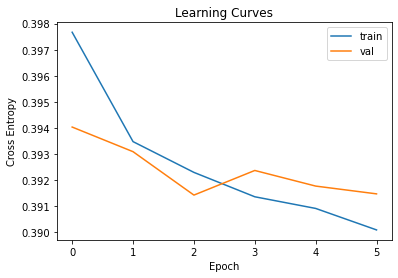

In [15]:
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(fit_model.history['loss'], label='train')
pyplot.plot(fit_model.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

## Attempt 3
### Similar to Attempt 1 but Batch size is larger and different loss.

In [16]:
# Split our preprocessed data into our features and target arrays
y = df["Diabetes_012"].values
X = df.drop(columns="Diabetes_012").values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [17]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 120
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 30
nn3 = tf.keras.models.Sequential()

# First hidden layer
nn3.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn3.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn3.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 120)               2640      
_________________________________________________________________
dense_9 (Dense)              (None, 50)                6050      
_________________________________________________________________
dense_10 (Dense)             (None, 30)                1530      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 31        
Total params: 10,251
Trainable params: 10,251
Non-trainable params: 0
_________________________________________________________________


In [18]:
nn3.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
fit_model = nn3.fit(X_train_scaled,y_train, batch_size=32, epochs=200, callbacks=[callback], validation_split=0.2)

Epoch 1/200
4757/4757 [==============================] - 5s 1ms/step - loss: 0.3965 - accuracy: 0.7201 - val_loss: 0.3927 - val_accuracy: 0.7394
Epoch 2/200
4757/4757 [==============================] - 5s 976us/step - loss: 0.3924 - accuracy: 0.7241 - val_loss: 0.3921 - val_accuracy: 0.7079
Epoch 3/200
4757/4757 [==============================] - 5s 990us/step - loss: 0.3913 - accuracy: 0.7228 - val_loss: 0.3906 - val_accuracy: 0.7280 0.3909 - accuracy: 0.72 - ETA: 0s - loss: 0.3909 - accura
Epoch 4/200
4757/4757 [==============================] - 5s 972us/step - loss: 0.3905 - accuracy: 0.7252 - val_loss: 0.3911 - val_accuracy: 0.7255
Epoch 5/200
4757/4757 [==============================] - 5s 993us/step - loss: 0.3897 - accuracy: 0.7259 - val_loss: 0.3909 - val_accuracy: 0.7152
Epoch 6/200
4757/4757 [==============================] - 5s 969us/step - loss: 0.3889 - accuracy: 0.7268 - val_loss: 0.3928 - val_accuracy: 0.7440


In [19]:
model_loss, model_accuracy = nn3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1982/1982 - 1s - loss: 0.3897 - accuracy: 0.7430
Loss: 0.38970044255256653, Accuracy: 0.7430148124694824


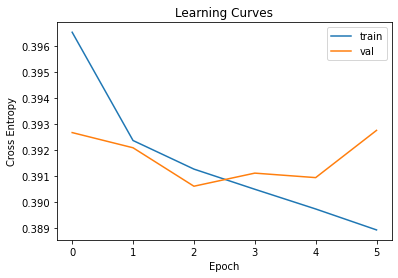

In [20]:
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(fit_model.history['loss'], label='train')
pyplot.plot(fit_model.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

## Attempt 4
### Kept columns above 0.05 of importance

In [21]:
# Split our preprocessed data into our features and target arrays
y = df["Diabetes_012"].values
X = df.drop(columns=['Diabetes_012', 'BMI', 'Age', 'Income', 'PhysHlth', 'Education', 'GenHlth', 'MentHlth']).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [22]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 120
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 30
nn4 = tf.keras.models.Sequential()

# First hidden layer
nn4.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn4.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn4.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn4.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 120)               1800      
_________________________________________________________________
dense_13 (Dense)             (None, 50)                6050      
_________________________________________________________________
dense_14 (Dense)             (None, 30)                1530      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 31        
Total params: 9,411
Trainable params: 9,411
Non-trainable params: 0
_________________________________________________________________


In [23]:
nn4.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
fit_model = nn4.fit(X_train_scaled,y_train, batch_size = 64, epochs=100, callbacks=[callback], validation_split=0.2)

Epoch 1/100
2379/2379 [==============================] - 3s 1ms/step - loss: 0.4251 - accuracy: 0.7144 - val_loss: 0.4240 - val_accuracy: 0.6908
Epoch 2/100
2379/2379 [==============================] - 3s 1ms/step - loss: 0.4224 - accuracy: 0.7131 - val_loss: 0.4223 - val_accuracy: 0.7314
Epoch 3/100
2379/2379 [==============================] - 3s 1ms/step - loss: 0.4219 - accuracy: 0.7172 - val_loss: 0.4220 - val_accuracy: 0.7076
Epoch 4/100
2379/2379 [==============================] - 3s 1ms/step - loss: 0.4216 - accuracy: 0.7137 - val_loss: 0.4227 - val_accuracy: 0.7098
Epoch 5/100
2379/2379 [==============================] - 3s 1ms/step - loss: 0.4213 - accuracy: 0.7167 - val_loss: 0.4234 - val_accuracy: 0.6973
Epoch 6/100
2379/2379 [==============================] - 3s 1ms/step - loss: 0.4212 - accuracy: 0.7152 - val_loss: 0.4227 - val_accuracy: 0.70881s -


In [24]:
model_loss, model_accuracy = nn4.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1982/1982 - 1s - loss: 0.4200 - accuracy: 0.7069
Loss: 0.42002177238464355, Accuracy: 0.7068590521812439


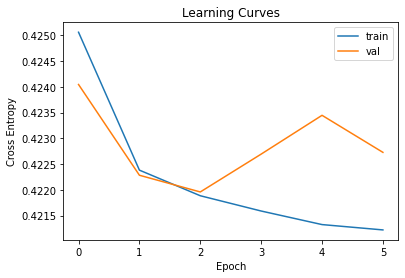

In [25]:
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(fit_model.history['loss'], label='train')
pyplot.plot(fit_model.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

## Attempt 5
### LeakyReLU

In [26]:
from keras.layers import LeakyReLU

In [27]:
# Split our preprocessed data into our features and target arrays
y = df["Diabetes_012"].values
X = df.drop(columns=['Diabetes_012', 'BMI', 'Age', 'Income', 'PhysHlth', 'Education', 'GenHlth', 'MentHlth']).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [28]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 120
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 30
nn5 = tf.keras.models.Sequential()

# First hidden layer
nn5.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Second hidden layer
nn5.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Third hidden layer
nn5.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Output layer
nn5.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 120)               1800      
_________________________________________________________________
dense_17 (Dense)             (None, 50)                6050      
_________________________________________________________________
dense_18 (Dense)             (None, 30)                1530      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 31        
Total params: 9,411
Trainable params: 9,411
Non-trainable params: 0
_________________________________________________________________


In [29]:
nn5.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
fit_model = nn5.fit(X_train_scaled,y_train, batch_size = 64, epochs=100, callbacks=[callback], validation_split=0.2)

Epoch 1/100
2379/2379 [==============================] - 3s 1ms/step - loss: 0.4246 - accuracy: 0.7113 - val_loss: 0.4233 - val_accuracy: 0.6914
Epoch 2/100
2379/2379 [==============================] - 3s 1ms/step - loss: 0.4224 - accuracy: 0.7181 - val_loss: 0.4225 - val_accuracy: 0.7209
Epoch 3/100
2379/2379 [==============================] - 3s 1ms/step - loss: 0.4219 - accuracy: 0.7210 - val_loss: 0.4228 - val_accuracy: 0.7096
Epoch 4/100
2379/2379 [==============================] - 3s 1ms/step - loss: 0.4216 - accuracy: 0.7191 - val_loss: 0.4228 - val_accuracy: 0.7151
Epoch 5/100
2379/2379 [==============================] - 3s 1ms/step - loss: 0.4215 - accuracy: 0.7194 - val_loss: 0.4226 - val_accuracy: 0.7209


In [30]:
model_loss, model_accuracy = nn5.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1982/1982 - 1s - loss: 0.4198 - accuracy: 0.7200
Loss: 0.41983237862586975, Accuracy: 0.7199937105178833


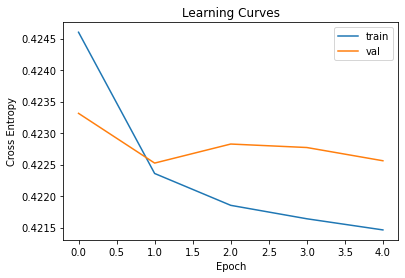

In [31]:
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(fit_model.history['loss'], label='train')
pyplot.plot(fit_model.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

## Attempt 6
### Batch size decreased. Nodes increased. Keeping 7 most important. LeakyReLU

In [32]:
# Split our preprocessed data into our features and target arrays
y = df["Diabetes_012"].values
X = df.drop(columns=['Diabetes_012', 'BMI', 'Age', 'Income', 'PhysHlth', 'Education', 'GenHlth', 'MentHlth']).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [33]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 120
hidden_nodes_layer2 = 80
hidden_nodes_layer3 = 40
nn6 = tf.keras.models.Sequential()

# First hidden layer
nn6.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="sigmoid"))

# Second hidden layer
nn6.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Third hidden layer
nn6.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Output layer
nn6.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn6.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 120)               1800      
_________________________________________________________________
dense_21 (Dense)             (None, 80)                9680      
_________________________________________________________________
dense_22 (Dense)             (None, 40)                3240      
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 41        
Total params: 14,761
Trainable params: 14,761
Non-trainable params: 0
_________________________________________________________________


In [34]:
nn6.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
fit_model = nn6.fit(X_train_scaled,y_train, batch_size = 16, epochs=100, callbacks=[callback], validation_split=0.2)

Epoch 1/100
9513/9513 [==============================] - 10s 1ms/step - loss: 0.4260 - accuracy: 0.7165 - val_loss: 0.4237 - val_accuracy: 0.7189
Epoch 2/100
9513/9513 [==============================] - 10s 1ms/step - loss: 0.4235 - accuracy: 0.7122 - val_loss: 0.4237 - val_accuracy: 0.6942
Epoch 3/100
9513/9513 [==============================] - 9s 995us/step - loss: 0.4232 - accuracy: 0.7168 - val_loss: 0.4303 - val_accuracy: 0.6718
Epoch 4/100
9513/9513 [==============================] - 9s 981us/step - loss: 0.4227 - accuracy: 0.7166 - val_loss: 0.4229 - val_accuracy: 0.6921
Epoch 5/100
9513/9513 [==============================] - 10s 1ms/step - loss: 0.4225 - accuracy: 0.7125 - val_loss: 0.4236 - val_accuracy: 0.7109
Epoch 6/100
9513/9513 [==============================] - 9s 995us/step - loss: 0.4223 - accuracy: 0.7139 - val_loss: 0.4251 - val_accuracy: 0.7145
Epoch 7/100
9513/9513 [==============================] - 9s 989us/step - loss: 0.4222 - accuracy: 0.7118 - val_loss: 0.42

In [35]:
model_loss, model_accuracy = nn6.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1982/1982 - 1s - loss: 0.4209 - accuracy: 0.7302
Loss: 0.4208926260471344, Accuracy: 0.7302428483963013


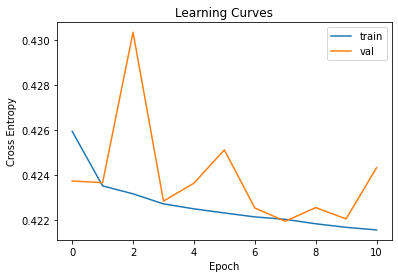

In [36]:
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(fit_model.history['loss'], label='train')
pyplot.plot(fit_model.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

## Attempt 7
### Removing pre diabetes. Batch default. Keeping all the columns. Similar to Attempt 2

In [37]:
df_no_pre = df[df["Diabetes_012"] != 1]
df_no_pre.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [38]:
# Split our preprocessed data into our features and target arrays
y = df_no_pre["Diabetes_012"].values
X = df_no_pre.drop(columns=['Diabetes_012']).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [39]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 120
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 30
nn7 = tf.keras.models.Sequential()

# First hidden layer
nn7.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Second hidden layer
nn7.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Third hidden layer
nn7.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Output layer
nn7.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn7.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 120)               2640      
_________________________________________________________________
dense_25 (Dense)             (None, 50)                6050      
_________________________________________________________________
dense_26 (Dense)             (None, 30)                1530      
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 31        
Total params: 10,251
Trainable params: 10,251
Non-trainable params: 0
_________________________________________________________________


In [40]:
nn7.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
fit_model = nn7.fit(X_train_scaled,y_train, batch_size = 32, epochs=100, callbacks=[callback], validation_split=0.2)

Epoch 1/100
4670/4670 [==============================] - 5s 1ms/step - loss: 0.3929 - accuracy: 0.7340 - val_loss: 0.3993 - val_accuracy: 0.7126
Epoch 2/100
4670/4670 [==============================] - 5s 1ms/step - loss: 0.3888 - accuracy: 0.7394 - val_loss: 0.3996 - val_accuracy: 0.7242
Epoch 3/100
4670/4670 [==============================] - 5s 1ms/step - loss: 0.3877 - accuracy: 0.7410 - val_loss: 0.3986 - val_accuracy: 0.7426
Epoch 4/100
4670/4670 [==============================] - 5s 1ms/step - loss: 0.3868 - accuracy: 0.7390 - val_loss: 0.3987 - val_accuracy: 0.7310
Epoch 5/100
4670/4670 [==============================] - 5s 1ms/step - loss: 0.3860 - accuracy: 0.7404 - val_loss: 0.3999 - val_accuracy: 0.7364
Epoch 6/100
4670/4670 [==============================] - 5s 1ms/step - loss: 0.3852 - accuracy: 0.7396 - val_loss: 0.3990 - val_accuracy: 0.7395


In [41]:
model_loss, model_accuracy = nn7.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1946/1946 - 1s - loss: 0.3936 - accuracy: 0.7424
Loss: 0.3936372995376587, Accuracy: 0.7423831224441528


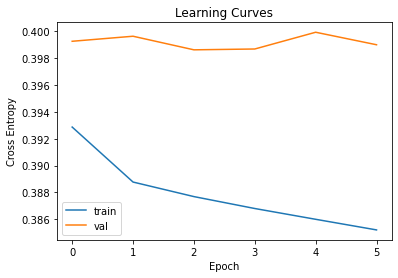

In [42]:
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(fit_model.history['loss'], label='train')
pyplot.plot(fit_model.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

## Attempt 8

In [43]:
df_no_pre = df[df["Diabetes_012"] != 1]
df_no_pre.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [44]:
# Split our preprocessed data into our features and target arrays
y = df_no_pre["Diabetes_012"].values
X = df_no_pre.drop(columns=['Diabetes_012']).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [45]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 120
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 30
nn8 = tf.keras.models.Sequential()

# First hidden layer
nn8.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Second hidden layer
nn8.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Third hidden layer
nn8.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Output layer
nn8.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn8.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 120)               2640      
_________________________________________________________________
dense_29 (Dense)             (None, 50)                6050      
_________________________________________________________________
dense_30 (Dense)             (None, 30)                1530      
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 31        
Total params: 10,251
Trainable params: 10,251
Non-trainable params: 0
_________________________________________________________________


In [46]:
nn8.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
fit_model = nn8.fit(X_train_scaled,y_train, batch_size = 32, epochs=200, callbacks=[callback], validation_split=0.2)

Epoch 1/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.3925 - accuracy: 0.7320 - val_loss: 0.4005 - val_accuracy: 0.7314
Epoch 2/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.3888 - accuracy: 0.7402 - val_loss: 0.3992 - val_accuracy: 0.7225
Epoch 3/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.3875 - accuracy: 0.7431 - val_loss: 0.4000 - val_accuracy: 0.7340
Epoch 4/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.3867 - accuracy: 0.7420 - val_loss: 0.4009 - val_accuracy: 0.7431
Epoch 5/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.3862 - accuracy: 0.7437 - val_loss: 0.3995 - val_accuracy: 0.7169


In [47]:
model_loss, model_accuracy = nn8.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1946/1946 - 1s - loss: 0.3942 - accuracy: 0.7207
Loss: 0.39424270391464233, Accuracy: 0.72065269947052


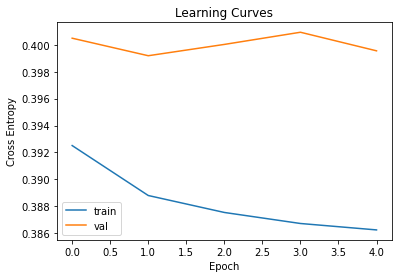

In [48]:
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(fit_model.history['loss'], label='train')
pyplot.plot(fit_model.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

## Attempt 9

In [49]:
df_no_pre = df[df["Diabetes_012"] != 1]
df_no_pre.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [50]:
# Split our preprocessed data into our features and target arrays
y = df_no_pre["Diabetes_012"].values
X = df_no_pre.drop(columns=['Diabetes_012']).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [51]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 120
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 30
nn9 = tf.keras.models.Sequential()

# First hidden layer
nn9.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Second hidden layer
nn9.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Third hidden layer
nn9.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Output layer
nn9.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn9.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 120)               2640      
_________________________________________________________________
dense_33 (Dense)             (None, 50)                6050      
_________________________________________________________________
dense_34 (Dense)             (None, 30)                1530      
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 31        
Total params: 10,251
Trainable params: 10,251
Non-trainable params: 0
_________________________________________________________________


In [52]:
nn9.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
fit_model = nn9.fit(X_train_scaled,y_train, batch_size = 16, epochs=200, callbacks=[callback], validation_split=0.2)

Epoch 1/200
9340/9340 [==============================] - 10s 1ms/step - loss: 0.3929 - accuracy: 0.7344 - val_loss: 0.4003 - val_accuracy: 0.7151
Epoch 2/200
9340/9340 [==============================] - 9s 1ms/step - loss: 0.3891 - accuracy: 0.7390 - val_loss: 0.4007 - val_accuracy: 0.7249
Epoch 3/200
9340/9340 [==============================] - 9s 998us/step - loss: 0.3880 - accuracy: 0.7401 - val_loss: 0.4006 - val_accuracy: 0.7551
Epoch 4/200
9340/9340 [==============================] - 9s 1ms/step - loss: 0.3870 - accuracy: 0.7445 - val_loss: 0.4001 - val_accuracy: 0.7443
Epoch 5/200
9340/9340 [==============================] - 9s 1ms/step - loss: 0.3867 - accuracy: 0.7443 - val_loss: 0.3985 - val_accuracy: 0.7385
Epoch 6/200
9340/9340 [==============================] - 9s 1ms/step - loss: 0.3860 - accuracy: 0.7462 - val_loss: 0.4003 - val_accuracy: 0.7390
Epoch 7/200
9340/9340 [==============================] - 9s 1ms/step - loss: 0.3857 - accuracy: 0.7441 - val_loss: 0.3987 - val

In [53]:
model_loss, model_accuracy = nn8.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1946/1946 - 1s - loss: 0.3942 - accuracy: 0.7207
Loss: 0.39424270391464233, Accuracy: 0.72065269947052


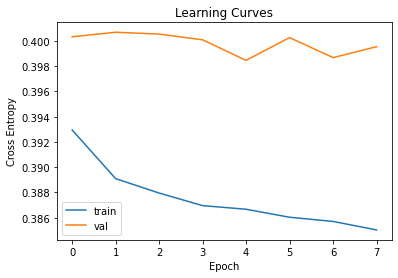

In [54]:
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(fit_model.history['loss'], label='train')
pyplot.plot(fit_model.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

## Attempt 10

In [55]:
# Split our preprocessed data into our features and target arrays
y = df_no_pre["Diabetes_012"].values
X = df_no_pre.drop(columns=['Diabetes_012']).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [56]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 120
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 30
nn10 = tf.keras.models.Sequential()

# First hidden layer
nn10.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Second hidden layer
nn10.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Third hidden layer
nn10.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Output layer
nn10.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn10.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 120)               2640      
_________________________________________________________________
dense_37 (Dense)             (None, 50)                6050      
_________________________________________________________________
dense_38 (Dense)             (None, 30)                1530      
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 31        
Total params: 10,251
Trainable params: 10,251
Non-trainable params: 0
_________________________________________________________________


In [57]:
nn10.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
fit_model = nn10.fit(X_train_scaled,y_train, batch_size = 8, epochs=200, callbacks=[callback], validation_split=0.2)

Epoch 1/200
18679/18679 [==============================] - 19s 989us/step - loss: 0.3931 - accuracy: 0.7332 - val_loss: 0.4015 - val_accuracy: 0.7371
Epoch 2/200
18679/18679 [==============================] - 18s 986us/step - loss: 0.3893 - accuracy: 0.7426 - val_loss: 0.3995 - val_accuracy: 0.7373
Epoch 3/200
18679/18679 [==============================] - 19s 996us/step - loss: 0.3881 - accuracy: 0.7465 - val_loss: 0.4004 - val_accuracy: 0.7291
Epoch 4/200
18679/18679 [==============================] - 19s 1ms/step - loss: 0.3874 - accuracy: 0.7463 - val_loss: 0.4005 - val_accuracy: 0.74960.3878 - 
Epoch 5/200
18679/18679 [==============================] - 22s 1ms/step - loss: 0.3868 - accuracy: 0.7465 - val_loss: 0.4003 - val_accuracy: 0.7469


In [58]:
model_loss, model_accuracy = nn8.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1946/1946 - 1s - loss: 0.3942 - accuracy: 0.7207
Loss: 0.39424270391464233, Accuracy: 0.72065269947052


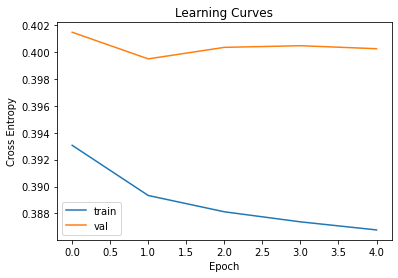

In [59]:
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(fit_model.history['loss'], label='train')
pyplot.plot(fit_model.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

## Finding Columns to adjust to potentially improve training

In [60]:
df_no_pre.nunique(axis=0)

Diabetes_012             2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     83
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

In [61]:
df_no_pre["MentHlth"].value_counts().sort_index(ascending=False)

30.0     11727
29.0       155
28.0       320
27.0        78
26.0        42
25.0      1155
24.0        31
23.0        36
22.0        61
21.0       218
20.0      3287
19.0        16
18.0        93
17.0        53
16.0        87
15.0      5372
14.0      1135
13.0        41
12.0       388
11.0        39
10.0      6234
9.0         82
8.0        626
7.0       3037
6.0        960
5.0       8849
4.0       3706
3.0       7256
2.0      12823
1.0       8418
0.0     172724
Name: MentHlth, dtype: int64

In [62]:
min_value = df_no_pre['MentHlth'].min()
max_value = df_no_pre['MentHlth'].max()
bins = np.linspace(min_value,max_value,7)
labels = [1, 2, 3, 4, 5, 6]
df_no_pre['MentalHealth'] = pd.cut(df_no_pre['MentHlth'], bins=bins, labels=labels, include_lowest=True)
df_no_pre = df_no_pre.drop(columns=['MentHlth'])
df_no_pre.head()

C:\Users\cabon\AppData\Local\Temp/ipykernel_13076/1883573589.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_pre['MentalHealth'] = pd.cut(df_no_pre['MentHlth'], bins=bins, labels=labels, include_lowest=True)


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,MentalHealth
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,15.0,1.0,0.0,9.0,4.0,3.0,4
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,7.0,6.0,1.0,1
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,1.0,0.0,9.0,4.0,8.0,6
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,11.0,3.0,6.0,1
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,11.0,5.0,4.0,1


In [63]:
df_no_pre["PhysHlth"].value_counts().sort_index(ascending=False)

30.0     18842
29.0       208
28.0       506
27.0        96
26.0        65
25.0      1300
24.0        69
23.0        53
22.0        66
21.0       645
20.0      3194
19.0        20
18.0       148
17.0        93
16.0       109
15.0      4775
14.0      2525
13.0        61
12.0       559
11.0        57
10.0      5425
9.0        174
8.0        788
7.0       4448
6.0       1292
5.0       7454
4.0       4444
3.0       8322
2.0      14516
1.0      11214
0.0     157581
Name: PhysHlth, dtype: int64

In [64]:
min_value = df_no_pre['PhysHlth'].min()
max_value = df_no_pre['PhysHlth'].max()
bins = np.linspace(min_value,max_value,7)
labels = [1, 2, 3, 4, 5, 6]
df_no_pre['PhysicalHealth'] = pd.cut(df_no_pre['PhysHlth'], bins=bins, labels=labels, include_lowest=True)
df_no_pre = df_no_pre.drop(columns=['PhysHlth'])
df_no_pre.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,DiffWalk,Sex,Age,Education,Income,MentalHealth,PhysicalHealth
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,1.0,0.0,9.0,4.0,3.0,4,3
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,7.0,6.0,1.0,1,1
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,1.0,0.0,9.0,4.0,8.0,6,6
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,11.0,3.0,6.0,1,1
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,11.0,5.0,4.0,1,1


## Attempt 11

In [65]:
# Split our preprocessed data into our features and target arrays
y = df_no_pre["Diabetes_012"].values
X = df_no_pre.drop(columns=['Diabetes_012']).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [66]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 120
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 30
nn11 = tf.keras.models.Sequential()

# First hidden layer
nn11.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Second hidden layer
nn11.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Third hidden layer
nn11.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Output layer
nn11.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn11.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 120)               2640      
_________________________________________________________________
dense_41 (Dense)             (None, 50)                6050      
_________________________________________________________________
dense_42 (Dense)             (None, 30)                1530      
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 31        
Total params: 10,251
Trainable params: 10,251
Non-trainable params: 0
_________________________________________________________________


In [67]:
nn11.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
fit_model = nn11.fit(X_train_scaled,y_train, batch_size = 32, epochs=200, callbacks=[callback], validation_split=0.2)

Epoch 1/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3926 - accuracy: 0.7341 - val_loss: 0.3995 - val_accuracy: 0.7444
Epoch 2/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.3886 - accuracy: 0.7435 - val_loss: 0.3994 - val_accuracy: 0.7390
Epoch 3/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.3875 - accuracy: 0.7423 - val_loss: 0.3993 - val_accuracy: 0.7328
Epoch 4/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.3870 - accuracy: 0.7427 - val_loss: 0.3989 - val_accuracy: 0.7469
Epoch 5/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.3862 - accuracy: 0.7419 - val_loss: 0.3997 - val_accuracy: 0.7542
Epoch 6/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3856 - accuracy: 0.7408 - val_loss: 0.3989 - val_accuracy: 0.7310
Epoch 7/200
4670/4670 [==============================] - 7s 2ms/step - loss: 0.3850 - accuracy: 0.7430 - val_loss: 0.3997 - val_ac

In [68]:
model_loss, model_accuracy = nn11.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1946/1946 - 1s - loss: 0.3943 - accuracy: 0.7415
Loss: 0.39434173703193665, Accuracy: 0.7414515614509583


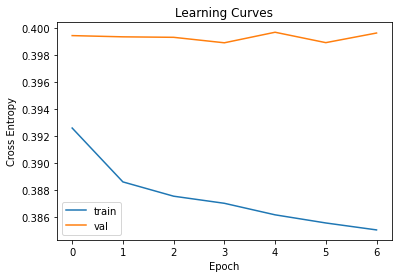

In [69]:
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(fit_model.history['loss'], label='train')
pyplot.plot(fit_model.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

## Attempt 12
### With all diabete choices but with leaky relu

In [70]:
df_dumb = df.copy()
min_value = df_dumb['MentHlth'].min()
max_value = df_dumb['MentHlth'].max()
bins = np.linspace(min_value,max_value,7)
labels = ["1-5", "6-10", "11-15", "16-20", "21-25", "26-30"]
df_dumb['MentalHealth'] = pd.cut(df_dumb['MentHlth'], bins=bins, labels=labels, include_lowest=True)
df_dumb = df_dumb.drop(columns=['MentHlth'])
df_dumb.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,MentalHealth
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,15.0,1.0,0.0,9.0,4.0,3.0,16-20
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,7.0,6.0,1.0,1-5
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,1.0,0.0,9.0,4.0,8.0,26-30
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,11.0,3.0,6.0,1-5
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,11.0,5.0,4.0,1-5


In [71]:
min_value = df_dumb['PhysHlth'].min()
max_value = df_dumb['PhysHlth'].max()
bins = np.linspace(min_value,max_value,7)
labels = ["1-5", "6-10", "11-15", "16-20", "21-25", "26-30"]
df_dumb['PhysicalHealth'] = pd.cut(df_dumb['PhysHlth'], bins=bins, labels=labels, include_lowest=True)
df_dumb = df_dumb.drop(columns=['PhysHlth'])
df_dumb.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,DiffWalk,Sex,Age,Education,Income,MentalHealth,PhysicalHealth
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,1.0,0.0,9.0,4.0,3.0,16-20,11-15
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,7.0,6.0,1.0,1-5,1-5
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,1.0,0.0,9.0,4.0,8.0,26-30,26-30
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,11.0,3.0,6.0,1-5,1-5
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,11.0,5.0,4.0,1-5,1-5


In [72]:
df_dummies = pd.get_dummies(df_dumb)
df_dummies.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,MentalHealth_11-15,MentalHealth_16-20,MentalHealth_21-25,MentalHealth_26-30,PhysicalHealth_1-5,PhysicalHealth_6-10,PhysicalHealth_11-15,PhysicalHealth_16-20,PhysicalHealth_21-25,PhysicalHealth_26-30
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,1,0,0,0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0,0,0,0,1,0,0,0,0,0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,1,0,0,0,0,0,1
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,0,1,0,0,0,0,0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,0,1,0,0,0,0,0


In [73]:
# Split our preprocessed data into our features and target arrays
y = df_dummies["Diabetes_012"].values
X = df_dummies.drop(columns="Diabetes_012").values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [74]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 120
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 30
nn12 = tf.keras.models.Sequential()

# First hidden layer
nn12.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Second hidden layer
nn12.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Third hidden layer
nn12.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Output layer
nn12.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn12.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 120)               3840      
_________________________________________________________________
dense_45 (Dense)             (None, 50)                6050      
_________________________________________________________________
dense_46 (Dense)             (None, 30)                1530      
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 31        
Total params: 11,451
Trainable params: 11,451
Non-trainable params: 0
_________________________________________________________________


In [75]:
nn12.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
fit_model = nn12.fit(X_train_scaled,y_train, batch_size=32, epochs=200, callbacks=[callback], validation_split=0.2)

Epoch 1/200
4757/4757 [==============================] - 6s 1ms/step - loss: 0.3973 - accuracy: 0.7167 - val_loss: 0.3934 - val_accuracy: 0.7037
Epoch 2/200
4757/4757 [==============================] - 5s 1ms/step - loss: 0.3929 - accuracy: 0.7247 - val_loss: 0.3925 - val_accuracy: 0.7434
Epoch 3/200
4757/4757 [==============================] - 5s 1ms/step - loss: 0.3917 - accuracy: 0.7277 - val_loss: 0.3915 - val_accuracy: 0.7217
Epoch 4/200
4757/4757 [==============================] - 5s 1ms/step - loss: 0.3910 - accuracy: 0.7305 - val_loss: 0.3914 - val_accuracy: 0.7352
Epoch 5/200
4757/4757 [==============================] - 5s 1ms/step - loss: 0.3899 - accuracy: 0.7320 - val_loss: 0.3945 - val_accuracy: 0.7145
Epoch 6/200
4757/4757 [==============================] - 5s 1ms/step - loss: 0.3889 - accuracy: 0.7311 - val_loss: 0.3911 - val_accuracy: 0.7271
Epoch 7/200
4757/4757 [==============================] - 5s 1ms/step - loss: 0.3881 - accuracy: 0.7309 - val_loss: 0.3925 - val_ac

In [76]:
model_loss, model_accuracy = nn12.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1982/1982 - 1s - loss: 0.3897 - accuracy: 0.7246
Loss: 0.38969382643699646, Accuracy: 0.7246136665344238


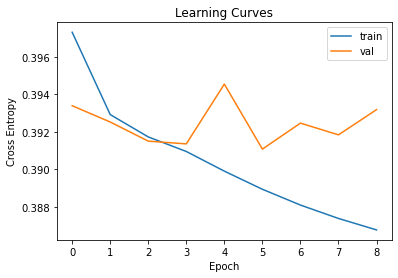

In [77]:
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(fit_model.history['loss'], label='train')
pyplot.plot(fit_model.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

## Attempt 13

In [78]:
min_value = df['MentHlth'].min()
max_value = df['MentHlth'].max()
bins = np.linspace(min_value,max_value,7)
labels = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
df['MentalHealth'] = pd.cut(df['MentHlth'], bins=bins, labels=labels, include_lowest=True)
df = df.drop(columns=['MentHlth'])
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,MentalHealth
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,15.0,1.0,0.0,9.0,4.0,3.0,4.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,7.0,6.0,1.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,1.0,0.0,9.0,4.0,8.0,6.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,11.0,3.0,6.0,1.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,11.0,5.0,4.0,1.0


In [79]:
min_value = df['PhysHlth'].min()
max_value = df['PhysHlth'].max()
bins = np.linspace(min_value,max_value,7)
labels = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
df['PhysicalHealth'] = pd.cut(df['PhysHlth'], bins=bins, labels=labels, include_lowest=True)
df = df.drop(columns=['PhysHlth'])
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,DiffWalk,Sex,Age,Education,Income,MentalHealth,PhysicalHealth
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,1.0,0.0,9.0,4.0,3.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,7.0,6.0,1.0,1.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,1.0,0.0,9.0,4.0,8.0,6.0,6.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,11.0,3.0,6.0,1.0,1.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,11.0,5.0,4.0,1.0,1.0


In [80]:
# Split our preprocessed data into our features and target arrays
y = df["Diabetes_012"].values
X = df.drop(columns="Diabetes_012").values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [81]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 120
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 30
nn13 = tf.keras.models.Sequential()

# First hidden layer
nn13.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Second hidden layer
nn13.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Third hidden layer
nn13.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Output layer
nn13.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn13.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 120)               2640      
_________________________________________________________________
dense_49 (Dense)             (None, 50)                6050      
_________________________________________________________________
dense_50 (Dense)             (None, 30)                1530      
_________________________________________________________________
dense_51 (Dense)             (None, 1)                 31        
Total params: 10,251
Trainable params: 10,251
Non-trainable params: 0
_________________________________________________________________


In [82]:
nn13.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
fit_model = nn13.fit(X_train_scaled,y_train, batch_size=32, epochs=200, callbacks=[callback], validation_split=0.2)

Epoch 1/200
4757/4757 [==============================] - 6s 1ms/step - loss: 0.3965 - accuracy: 0.7182 - val_loss: 0.3928 - val_accuracy: 0.7227
Epoch 2/200
4757/4757 [==============================] - 5s 1ms/step - loss: 0.3923 - accuracy: 0.7240 - val_loss: 0.3913 - val_accuracy: 0.7341
Epoch 3/200
4757/4757 [==============================] - 5s 1ms/step - loss: 0.3911 - accuracy: 0.7267 - val_loss: 0.3919 - val_accuracy: 0.7439
Epoch 4/200
4757/4757 [==============================] - 5s 1ms/step - loss: 0.3904 - accuracy: 0.7264 - val_loss: 0.3912 - val_accuracy: 0.7314
Epoch 5/200
4757/4757 [==============================] - 5s 1ms/step - loss: 0.3899 - accuracy: 0.7266 - val_loss: 0.3918 - val_accuracy: 0.7375
Epoch 6/200
4757/4757 [==============================] - 5s 1ms/step - loss: 0.3891 - accuracy: 0.7246 - val_loss: 0.3914 - val_accuracy: 0.7344
Epoch 7/200
4757/4757 [==============================] - 6s 1ms/step - loss: 0.3886 - accuracy: 0.7270 - val_loss: 0.3936 - val_ac

In [83]:
model_loss, model_accuracy = nn13.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1982/1982 - 1s - loss: 0.3901 - accuracy: 0.7002
Loss: 0.39010322093963623, Accuracy: 0.7001734375953674


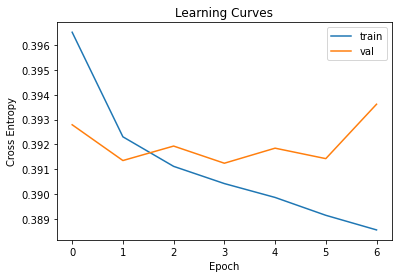

In [84]:
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(fit_model.history['loss'], label='train')
pyplot.plot(fit_model.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

## Attempt 14
### Attempted to further improve Attempt 11

In [85]:
# Split our preprocessed data into our features and target arrays
y = df_no_pre["Diabetes_012"].values
X = df_no_pre.drop(columns=['Diabetes_012']).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [86]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 140
hidden_nodes_layer2 = 100
hidden_nodes_layer3 = 80
hidden_nodes_layer3 = 60
nn14 = tf.keras.models.Sequential()

# First hidden layer
nn14.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Second hidden layer
nn14.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Third hidden layer
nn14.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Fourth hidden layer
nn14.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Output layer
nn14.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn14.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 140)               3080      
_________________________________________________________________
dense_53 (Dense)             (None, 100)               14100     
_________________________________________________________________
dense_54 (Dense)             (None, 60)                6060      
_________________________________________________________________
dense_55 (Dense)             (None, 60)                3660      
_________________________________________________________________
dense_56 (Dense)             (None, 1)                 61        
Total params: 26,961
Trainable params: 26,961
Non-trainable params: 0
_________________________________________________________________


In [87]:
nn14.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
fit_model = nn14.fit(X_train_scaled,y_train, batch_size = 32, epochs=200, callbacks=[callback], validation_split=0.2)

Epoch 1/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3930 - accuracy: 0.7369 - val_loss: 0.4008 - val_accuracy: 0.7524
Epoch 2/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3891 - accuracy: 0.7400 - val_loss: 0.4003 - val_accuracy: 0.7277
Epoch 3/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3879 - accuracy: 0.7429 - val_loss: 0.3992 - val_accuracy: 0.7409
Epoch 4/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3870 - accuracy: 0.7425 - val_loss: 0.3983 - val_accuracy: 0.7239
Epoch 5/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3864 - accuracy: 0.7445 - val_loss: 0.3992 - val_accuracy: 0.7286
Epoch 6/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3857 - accuracy: 0.7404 - val_loss: 0.3989 - val_accuracy: 0.7328


In [88]:
model_loss, model_accuracy = nn14.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1946/1946 - 1s - loss: 0.3937 - accuracy: 0.7355
Loss: 0.39374658465385437, Accuracy: 0.7355090379714966


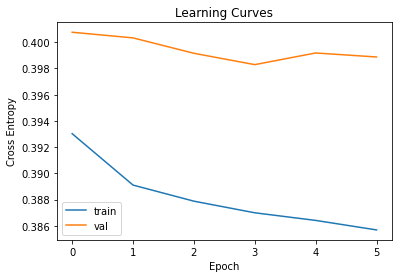

In [89]:
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(fit_model.history['loss'], label='train')
pyplot.plot(fit_model.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

## Attempt 15
### Try improving previous

In [90]:
# Split our preprocessed data into our features and target arrays
y = df_no_pre["Diabetes_012"].values
X = df_no_pre.drop(columns=['Diabetes_012']).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [91]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 140
hidden_nodes_layer2 = 100
hidden_nodes_layer3 = 80
hidden_nodes_layer4 = 60
nn15 = tf.keras.models.Sequential()

# First hidden layer
nn15.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn15.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn15.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Fourth hidden layer
nn15.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
nn15.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn15.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 140)               3080      
_________________________________________________________________
dense_58 (Dense)             (None, 100)               14100     
_________________________________________________________________
dense_59 (Dense)             (None, 80)                8080      
_________________________________________________________________
dense_60 (Dense)             (None, 60)                4860      
_________________________________________________________________
dense_61 (Dense)             (None, 1)                 61        
Total params: 30,181
Trainable params: 30,181
Non-trainable params: 0
_________________________________________________________________


In [92]:
nn15.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
fit_model = nn15.fit(X_train_scaled,y_train, batch_size = 32, epochs=200, callbacks=[callback], validation_split=0.2)

Epoch 1/200
4670/4670 [==============================] - 7s 1ms/step - loss: 0.3928 - accuracy: 0.7397 - val_loss: 0.4004 - val_accuracy: 0.7399
Epoch 2/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3889 - accuracy: 0.7430 - val_loss: 0.3997 - val_accuracy: 0.7392
Epoch 3/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3877 - accuracy: 0.7420 - val_loss: 0.3993 - val_accuracy: 0.7318
Epoch 4/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3869 - accuracy: 0.7408 - val_loss: 0.3994 - val_accuracy: 0.7516
Epoch 5/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3859 - accuracy: 0.7413 - val_loss: 0.3997 - val_accuracy: 0.7522


In [93]:
model_loss, model_accuracy = nn15.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1946/1946 - 1s - loss: 0.3940 - accuracy: 0.7547
Loss: 0.39398184418678284, Accuracy: 0.7547018527984619


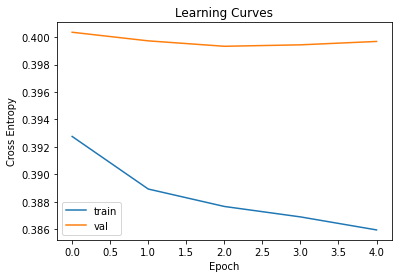

In [94]:
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(fit_model.history['loss'], label='train')
pyplot.plot(fit_model.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

## Attempt 16
### Similar to 8

In [95]:
df_no_pre2 = df[df["Diabetes_012"] != 1]
df_no_pre2.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,DiffWalk,Sex,Age,Education,Income,MentalHealth,PhysicalHealth
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,1.0,0.0,9.0,4.0,3.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,7.0,6.0,1.0,1.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,1.0,0.0,9.0,4.0,8.0,6.0,6.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,11.0,3.0,6.0,1.0,1.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,11.0,5.0,4.0,1.0,1.0


In [96]:
# Split our preprocessed data into our features and target arrays
y = df_no_pre2["Diabetes_012"].values
X = df_no_pre2.drop(columns=['Diabetes_012']).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [97]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 140
hidden_nodes_layer2 = 120
hidden_nodes_layer3 = 100
hidden_nodes_layer4 = 80
nn16 = tf.keras.models.Sequential()

# First hidden layer
nn16.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn16.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn16.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Fourth hidden layer
nn16.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
nn16.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn16.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 140)               3080      
_________________________________________________________________
dense_63 (Dense)             (None, 120)               16920     
_________________________________________________________________
dense_64 (Dense)             (None, 100)               12100     
_________________________________________________________________
dense_65 (Dense)             (None, 80)                8080      
_________________________________________________________________
dense_66 (Dense)             (None, 1)                 81        
Total params: 40,261
Trainable params: 40,261
Non-trainable params: 0
_________________________________________________________________


In [98]:
nn16.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
fit_model = nn16.fit(X_train_scaled,y_train, batch_size = 32, epochs=200, callbacks=[callback], validation_split=0.2)

Epoch 1/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3930 - accuracy: 0.7401 - val_loss: 0.3993 - val_accuracy: 0.7292
Epoch 2/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3886 - accuracy: 0.7406 - val_loss: 0.4000 - val_accuracy: 0.7192
Epoch 3/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3876 - accuracy: 0.7405 - val_loss: 0.3998 - val_accuracy: 0.7415
Epoch 4/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3868 - accuracy: 0.7422 - val_loss: 0.4006 - val_accuracy: 0.7396


In [99]:
model_loss, model_accuracy = nn16.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1946/1946 - 1s - loss: 0.3949 - accuracy: 0.7426
Loss: 0.39491215348243713, Accuracy: 0.7426400780677795


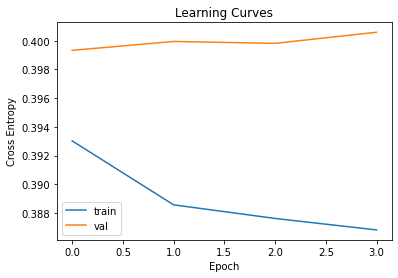

In [100]:
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(fit_model.history['loss'], label='train')
pyplot.plot(fit_model.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [101]:
# Done on a previous model that obtained 0.76 accuracy before extra runs
#nn16.save('../Models/diabetes_02_model')

## Attempt 17

In [102]:
# Split our preprocessed data into our features and target arrays
y = df_no_pre2["Diabetes_012"].values
X = df_no_pre2.drop(columns=['Diabetes_012']).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [103]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 160
hidden_nodes_layer2 = 140
hidden_nodes_layer3 = 120
hidden_nodes_layer4 = 100
nn17 = tf.keras.models.Sequential()

# First hidden layer
nn17.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn17.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn17.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Fourth hidden layer
nn17.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="sigmoid"))

# Output layer
nn17.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn17.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 160)               3520      
_________________________________________________________________
dense_68 (Dense)             (None, 140)               22540     
_________________________________________________________________
dense_69 (Dense)             (None, 120)               16920     
_________________________________________________________________
dense_70 (Dense)             (None, 100)               12100     
_________________________________________________________________
dense_71 (Dense)             (None, 1)                 101       
Total params: 55,181
Trainable params: 55,181
Non-trainable params: 0
_________________________________________________________________


In [104]:
nn17.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
fit_model = nn17.fit(X_train_scaled,y_train, batch_size = 32, epochs=200, callbacks=[callback], validation_split=0.2)

Epoch 1/200
4670/4670 [==============================] - 7s 1ms/step - loss: 0.3932 - accuracy: 0.7311 - val_loss: 0.4018 - val_accuracy: 0.7479
Epoch 2/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3891 - accuracy: 0.7299 - val_loss: 0.4001 - val_accuracy: 0.7011
Epoch 3/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3878 - accuracy: 0.7328 - val_loss: 0.4007 - val_accuracy: 0.7135
Epoch 4/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3869 - accuracy: 0.7353 - val_loss: 0.3990 - val_accuracy: 0.7279
Epoch 5/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3862 - accuracy: 0.7383 - val_loss: 0.4007 - val_accuracy: 0.7036
Epoch 6/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3854 - accuracy: 0.7367 - val_loss: 0.4002 - val_accuracy: 0.7554
Epoch 7/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3846 - accuracy: 0.7385 - val_loss: 0.4086 - val_ac

In [105]:
model_loss, model_accuracy = nn17.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1946/1946 - 1s - loss: 0.4005 - accuracy: 0.7682
Loss: 0.4005263149738312, Accuracy: 0.7681769132614136


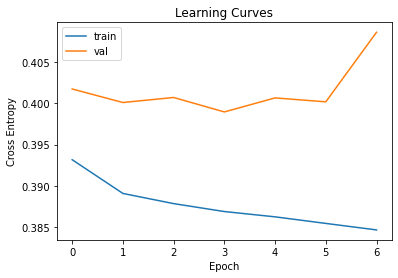

In [106]:
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(fit_model.history['loss'], label='train')
pyplot.plot(fit_model.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

## Attempt 18
### Similar to 16

In [107]:
# Split our preprocessed data into our features and target arrays
y = df_no_pre2["Diabetes_012"].values
X = df_no_pre2.drop(columns=['Diabetes_012']).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [108]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 70
hidden_nodes_layer2 = 20
hidden_nodes_layer3 = 20
hidden_nodes_layer4 = 10
nn18 = tf.keras.models.Sequential()

# First hidden layer
nn18.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn18.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Dropout
nn18.add(tf.keras.layers.Dense(5, input_dim=5, kernel_initializer='ones', kernel_regularizer=tf.keras.regularizers.L1(0.01),
    activity_regularizer=tf.keras.regularizers.L2(0.01)))

# Third hidden layer
nn18.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Dropout
nn18.add(tf.keras.layers.Dense(5, input_dim=5, kernel_initializer='ones', kernel_regularizer=tf.keras.regularizers.L1(0.01),
    activity_regularizer=tf.keras.regularizers.L2(0.01)))

# Fourth hidden layer
nn18.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
nn18.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn18.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 70)                1540      
_________________________________________________________________
dense_73 (Dense)             (None, 20)                1420      
_________________________________________________________________
dense_74 (Dense)             (None, 5)                 105       
_________________________________________________________________
dense_75 (Dense)             (None, 20)                120       
_________________________________________________________________
dense_76 (Dense)             (None, 5)                 105       
_________________________________________________________________
dense_77 (Dense)             (None, 10)                60        
_________________________________________________________________
dense_78 (Dense)             (None, 1)               

In [109]:
nn18.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
fit_model = nn18.fit(X_train_scaled,y_train, batch_size = 32, epochs=200, callbacks=[callback], validation_split=0.2)

Epoch 1/200
4670/4670 [==============================] - 6s 1ms/step - loss: 8.0206 - accuracy: 0.8593 - val_loss: 3.0467 - val_accuracy: 0.8544
Epoch 2/200
4670/4670 [==============================] - 6s 1ms/step - loss: 2.5899 - accuracy: 0.8593 - val_loss: 2.4198 - val_accuracy: 0.8544
Epoch 3/200
4670/4670 [==============================] - 6s 1ms/step - loss: 2.3448 - accuracy: 0.8593 - val_loss: 2.3010 - val_accuracy: 0.8544
Epoch 4/200
4670/4670 [==============================] - 5s 1ms/step - loss: 2.2364 - accuracy: 0.8593 - val_loss: 2.1979 - val_accuracy: 0.8544
Epoch 5/200
4670/4670 [==============================] - 6s 1ms/step - loss: 2.1341 - accuracy: 0.8593 - val_loss: 2.0956 - val_accuracy: 0.8544
Epoch 6/200
4670/4670 [==============================] - 6s 1ms/step - loss: 2.0296 - accuracy: 0.8593 - val_loss: 1.9908 - val_accuracy: 0.8544
Epoch 7/200
4670/4670 [==============================] - 6s 1ms/step - loss: 1.9270 - accuracy: 0.8593 - val_loss: 1.8888 - val_ac

4670/4670 [==============================] - 5s 1ms/step - loss: 0.4088 - accuracy: 0.7277 - val_loss: 0.4204 - val_accuracy: 0.7219
Epoch 58/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.4084 - accuracy: 0.7278 - val_loss: 0.4200 - val_accuracy: 0.7199
Epoch 59/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.4081 - accuracy: 0.7268 - val_loss: 0.4197 - val_accuracy: 0.7216
Epoch 60/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.4078 - accuracy: 0.7269 - val_loss: 0.4195 - val_accuracy: 0.7239
Epoch 61/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.4075 - accuracy: 0.7282 - val_loss: 0.4191 - val_accuracy: 0.7190
Epoch 62/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.4072 - accuracy: 0.7269 - val_loss: 0.4188 - val_accuracy: 0.7197
Epoch 63/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.4069 - accuracy: 0.7274 - val_loss: 0.4185 - val_accuracy

4670/4670 [==============================] - 5s 1ms/step - loss: 0.3946 - accuracy: 0.7279 - val_loss: 0.4080 - val_accuracy: 0.7179
Epoch 169/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.3946 - accuracy: 0.7271 - val_loss: 0.4080 - val_accuracy: 0.7231
Epoch 170/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.3945 - accuracy: 0.7282 - val_loss: 0.4079 - val_accuracy: 0.7161
Epoch 171/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.3945 - accuracy: 0.7276 - val_loss: 0.4079 - val_accuracy: 0.7199
Epoch 172/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.3944 - accuracy: 0.7271 - val_loss: 0.4079 - val_accuracy: 0.7224
Epoch 173/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.3944 - accuracy: 0.7274 - val_loss: 0.4079 - val_accuracy: 0.7225


In [110]:
model_loss, model_accuracy = nn18.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1946/1946 - 1s - loss: 0.4024 - accuracy: 0.7257
Loss: 0.40244632959365845, Accuracy: 0.7257118821144104


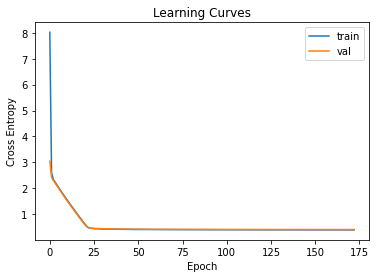

In [111]:
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(fit_model.history['loss'], label='train')
pyplot.plot(fit_model.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

## Attempy 19

In [112]:
# Split our preprocessed data into our features and target arrays
y = df_no_pre2["Diabetes_012"].values
X = df_no_pre2.drop(columns=['Diabetes_012']).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [113]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 50
hidden_nodes_layer2 = 20
hidden_nodes_layer3 = 20
hidden_nodes_layer4 = 10
nn19 = tf.keras.models.Sequential()

# First hidden layer
nn19.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn19.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Dropout
nn19.add(tf.keras.layers.Dense(5, input_dim=5, kernel_initializer='ones', kernel_regularizer=tf.keras.regularizers.L1(0.01),
    activity_regularizer=tf.keras.regularizers.L2(0.01)))

# Third hidden layer
nn19.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Dropout
nn19.add(tf.keras.layers.Dense(5, input_dim=5, kernel_initializer='ones', kernel_regularizer=tf.keras.regularizers.L1(0.01),
    activity_regularizer=tf.keras.regularizers.L2(0.01)))

# Fourth hidden layer
nn19.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
nn19.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn19.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_79 (Dense)             (None, 50)                1100      
_________________________________________________________________
dense_80 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_81 (Dense)             (None, 5)                 105       
_________________________________________________________________
dense_82 (Dense)             (None, 20)                120       
_________________________________________________________________
dense_83 (Dense)             (None, 5)                 105       
_________________________________________________________________
dense_84 (Dense)             (None, 10)                60        
_________________________________________________________________
dense_85 (Dense)             (None, 1)               

In [114]:
nn19.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
fit_model = nn19.fit(X_train_scaled,y_train, batch_size = 32, epochs=200, callbacks=[callback], validation_split=0.2)

Epoch 1/200
4670/4670 [==============================] - 6s 1ms/step - loss: 12.7759 - accuracy: 0.0214 - val_loss: 3.8941 - val_accuracy: 0.1240
Epoch 2/200
4670/4670 [==============================] - 5s 1ms/step - loss: 2.8819 - accuracy: 0.5425 - val_loss: 2.4909 - val_accuracy: 0.8533
Epoch 3/200
4670/4670 [==============================] - 5s 1ms/step - loss: 2.3844 - accuracy: 0.8593 - val_loss: 2.3262 - val_accuracy: 0.8544
Epoch 4/200
4670/4670 [==============================] - 5s 1ms/step - loss: 2.2604 - accuracy: 0.8593 - val_loss: 2.2211 - val_accuracy: 0.8544
Epoch 5/200
4670/4670 [==============================] - 5s 1ms/step - loss: 2.1592 - accuracy: 0.8593 - val_loss: 2.1237 - val_accuracy: 0.8544
Epoch 6/200
4670/4670 [==============================] - 5s 1ms/step - loss: 2.0626 - accuracy: 0.8593 - val_loss: 2.0285 - val_accuracy: 0.8544
Epoch 7/200
4670/4670 [==============================] - 5s 1ms/step - loss: 1.9673 - accuracy: 0.8593 - val_loss: 1.9334 - val_a

4670/4670 [==============================] - 5s 1ms/step - loss: 0.4010 - accuracy: 0.7284 - val_loss: 0.4138 - val_accuracy: 0.7168
Epoch 113/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.4009 - accuracy: 0.7274 - val_loss: 0.4137 - val_accuracy: 0.7181
Epoch 114/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.4008 - accuracy: 0.7275 - val_loss: 0.4136 - val_accuracy: 0.7206
Epoch 115/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.4007 - accuracy: 0.7276 - val_loss: 0.4135 - val_accuracy: 0.7206
Epoch 116/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.4006 - accuracy: 0.7272 - val_loss: 0.4135 - val_accuracy: 0.7224
Epoch 117/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.4005 - accuracy: 0.7278 - val_loss: 0.4133 - val_accuracy: 0.7201
Epoch 118/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.4004 - accuracy: 0.7273 - val_loss: 0.4133 - val_ac

Epoch 168/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3967 - accuracy: 0.7268 - val_loss: 0.4098 - val_accuracy: 0.7204
Epoch 169/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.3967 - accuracy: 0.7270 - val_loss: 0.4098 - val_accuracy: 0.7223
Epoch 170/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.3966 - accuracy: 0.7270 - val_loss: 0.4099 - val_accuracy: 0.7232
Epoch 171/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.3965 - accuracy: 0.7268 - val_loss: 0.4099 - val_accuracy: 0.7241


In [115]:
model_loss, model_accuracy = nn19.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1946/1946 - 1s - loss: 0.4045 - accuracy: 0.7266
Loss: 0.4045175611972809, Accuracy: 0.726643443107605


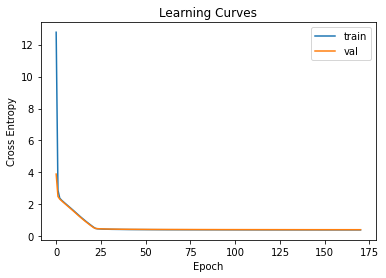

In [116]:
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(fit_model.history['loss'], label='train')
pyplot.plot(fit_model.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [120]:
lm = df_no_pre2["BMI"].value_counts().sort_index(ascending=False)
lm.to_csv('bmi.csv')

In [134]:
df_no_pre2["BMI"].value_counts()

27.0    24180
26.0    20277
24.0    19318
25.0    16911
28.0    16253
        ...  
85.0        1
91.0        1
86.0        1
90.0        1
78.0        1
Name: BMI, Length: 83, dtype: int64

In [124]:
df_no_pre2.groupby("BMI").mean().to_csv("uh.csv")

In [147]:
df_no_pre3 = df_no_pre2[:]
classifications_to_replace = df_no_pre3["BMI"].loc[lambda x : x>49].index.tolist()
classifications_to_replace2 = df_no_pre3["BMI"].loc[lambda x : (50>x) & (x>39)].index.tolist()
classifications_to_replace3 = df_no_pre3["BMI"].loc[lambda x : x<20].index.tolist()
for cls in classifications_to_replace:
    df_no_pre3.loc[cls:cls, ['BMI']] = ">49"
for cls in classifications_to_replace2:
    df_no_pre3.loc[cls:cls, ['BMI']] = "50>x>39"
for cls in classifications_to_replace3:
    df_no_pre3.loc[cls:cls, ['BMI']] = "<20"
df_no_pre3["BMI"].value_counts()

27.0       24180
26.0       20277
24.0       19318
25.0       16911
28.0       16253
23.0       15454
29.0       14602
30.0       14231
22.0       13502
31.0       12003
50>x>39    10844
32.0       10197
21.0        9780
33.0        8714
<20         7029
34.0        6991
20.0        6280
35.0        5419
36.0        4476
37.0        4027
38.0        3295
39.0        2798
>49         2468
Name: BMI, dtype: int64

In [150]:
df_dummies_3 = pd.get_dummies(df_no_pre3)
df_dummies_3.head()

,Diabetes_012,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,MentalHealth_3.0,MentalHealth_4.0,MentalHealth_5.0,MentalHealth_6.0,PhysicalHealth_1.0,PhysicalHealth_2.0,PhysicalHealth_3.0,PhysicalHealth_4.0,PhysicalHealth_5.0,PhysicalHealth_6.0
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0,1,0,0,0,0,1,0,0,0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
2,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,1,0,0,0,0,0,1
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0,0,0,0,1,0,0,0,0,0
4,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0,0,0,0,1,0,0,0,0,0


In [152]:
# Split our preprocessed data into our features and target arrays
y = df_dummies_3["Diabetes_012"].values
X = df_dummies_3.drop(columns=['Diabetes_012']).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [153]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 50
hidden_nodes_layer2 = 20
hidden_nodes_layer3 = 20
hidden_nodes_layer4 = 10
nn20 = tf.keras.models.Sequential()

# First hidden layer
nn20.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn20.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Dropout
nn20.add(tf.keras.layers.Dense(5, input_dim=5, kernel_initializer='ones', kernel_regularizer=tf.keras.regularizers.L1(0.01),
    activity_regularizer=tf.keras.regularizers.L2(0.01)))

# Third hidden layer
nn20.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Dropout
nn20.add(tf.keras.layers.Dense(5, input_dim=5, kernel_initializer='ones', kernel_regularizer=tf.keras.regularizers.L1(0.01),
    activity_regularizer=tf.keras.regularizers.L2(0.01)))

# Fourth hidden layer
nn20.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
nn20.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn20.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_86 (Dense)             (None, 50)                2700      
_________________________________________________________________
dense_87 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_88 (Dense)             (None, 5)                 105       
_________________________________________________________________
dense_89 (Dense)             (None, 20)                120       
_________________________________________________________________
dense_90 (Dense)             (None, 5)                 105       
_________________________________________________________________
dense_91 (Dense)             (None, 10)                60        
_________________________________________________________________
dense_92 (Dense)             (None, 1)               

In [154]:
nn20.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
fit_model = nn20.fit(X_train_scaled,y_train, batch_size = 32, epochs=200, callbacks=[callback], validation_split=0.2)

Epoch 1/200
4670/4670 [==============================] - 6s 1ms/step - loss: 17.8235 - accuracy: 0.0022 - val_loss: 5.0499 - val_accuracy: 0.0230
Epoch 2/200
4670/4670 [==============================] - 5s 1ms/step - loss: 3.2859 - accuracy: 0.3917 - val_loss: 2.5731 - val_accuracy: 0.8276
Epoch 3/200
4670/4670 [==============================] - 6s 1ms/step - loss: 2.4160 - accuracy: 0.8573 - val_loss: 2.3382 - val_accuracy: 0.8544
Epoch 4/200
4670/4670 [==============================] - 5s 1ms/step - loss: 2.2674 - accuracy: 0.8593 - val_loss: 2.2255 - val_accuracy: 0.8544
Epoch 5/200
4670/4670 [==============================] - 6s 1ms/step - loss: 2.1629 - accuracy: 0.8593 - val_loss: 2.1262 - val_accuracy: 0.8544
Epoch 6/200
4670/4670 [==============================] - 5s 1ms/step - loss: 2.0653 - accuracy: 0.8593 - val_loss: 2.0305 - val_accuracy: 0.8544
Epoch 7/200
4670/4670 [==============================] - 5s 1ms/step - loss: 1.9699 - accuracy: 0.8593 - val_loss: 1.9360 - val_a

Epoch 112/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3998 - accuracy: 0.7290 - val_loss: 0.4137 - val_accuracy: 0.7222
Epoch 113/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3997 - accuracy: 0.7290 - val_loss: 0.4136 - val_accuracy: 0.7231
Epoch 114/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3996 - accuracy: 0.7292 - val_loss: 0.4135 - val_accuracy: 0.7229
Epoch 115/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3995 - accuracy: 0.7294 - val_loss: 0.4133 - val_accuracy: 0.7205
Epoch 116/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3994 - accuracy: 0.7289 - val_loss: 0.4133 - val_accuracy: 0.7225
Epoch 117/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3993 - accuracy: 0.7292 - val_loss: 0.4131 - val_accuracy: 0.7209
Epoch 118/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3991 - accuracy: 0.7285 - val_loss: 0

Epoch 167/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3950 - accuracy: 0.7293 - val_loss: 0.4099 - val_accuracy: 0.7209
Epoch 168/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3949 - accuracy: 0.7294 - val_loss: 0.4098 - val_accuracy: 0.7178
Epoch 169/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3949 - accuracy: 0.7289 - val_loss: 0.4097 - val_accuracy: 0.7169
Epoch 170/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3948 - accuracy: 0.7284 - val_loss: 0.4097 - val_accuracy: 0.7199
Epoch 171/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3947 - accuracy: 0.7281 - val_loss: 0.4099 - val_accuracy: 0.7259
Epoch 172/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3947 - accuracy: 0.7295 - val_loss: 0.4097 - val_accuracy: 0.7215
Epoch 173/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3946 - accuracy: 0.7292 - val_loss: 0

In [155]:
model_loss, model_accuracy = nn20.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1946/1946 - 1s - loss: 0.4035 - accuracy: 0.7215
Loss: 0.4035022556781769, Accuracy: 0.7215360403060913


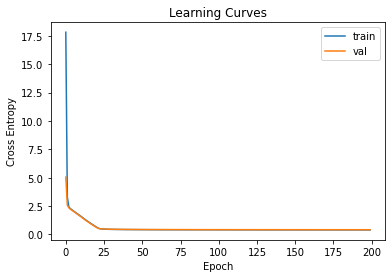

In [156]:
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(fit_model.history['loss'], label='train')
pyplot.plot(fit_model.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [158]:
df_no_pre4 = df_no_pre2.drop(columns="CholCheck")
df_no_pre4

,Diabetes_012,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,DiffWalk,Sex,Age,Education,Income,MentalHealth,PhysicalHealth
0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,5.0,1.0,0.0,9.0,4.0,3.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,3.0,0.0,0.0,7.0,6.0,1.0,1.0,1.0
2,0.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,5.0,1.0,0.0,9.0,4.0,8.0,6.0,6.0
3,0.0,1.0,0.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,11.0,3.0,6.0,1.0,1.0
4,0.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,11.0,5.0,4.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,1.0,5.0,6.0,7.0,1.0,1.0
253676,2.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,1.0,0.0,11.0,2.0,4.0,1.0,1.0
253677,0.0,0.0,0.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,2.0,5.0,2.0,1.0,1.0
253678,0.0,1.0,0.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,1.0,7.0,5.0,1.0,1.0,1.0


In [159]:
# Split our preprocessed data into our features and target arrays
y = df_no_pre4["Diabetes_012"].values
X = df_no_pre4.drop(columns=['Diabetes_012']).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [160]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 50
hidden_nodes_layer2 = 20
hidden_nodes_layer3 = 20
hidden_nodes_layer4 = 10
nn21 = tf.keras.models.Sequential()

# First hidden layer
nn21.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn21.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Dropout
nn21.add(tf.keras.layers.Dense(5, input_dim=5, kernel_initializer='ones', kernel_regularizer=tf.keras.regularizers.L1(0.01),
    activity_regularizer=tf.keras.regularizers.L2(0.01)))

# Third hidden layer
nn21.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Dropout
nn21.add(tf.keras.layers.Dense(5, input_dim=5, kernel_initializer='ones', kernel_regularizer=tf.keras.regularizers.L1(0.01),
    activity_regularizer=tf.keras.regularizers.L2(0.01)))

# Fourth hidden layer
nn21.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
nn21.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn21.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_93 (Dense)             (None, 50)                1050      
_________________________________________________________________
dense_94 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_95 (Dense)             (None, 5)                 105       
_________________________________________________________________
dense_96 (Dense)             (None, 20)                120       
_________________________________________________________________
dense_97 (Dense)             (None, 5)                 105       
_________________________________________________________________
dense_98 (Dense)             (None, 10)                60        
_________________________________________________________________
dense_99 (Dense)             (None, 1)               

In [161]:
nn21.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
fit_model = nn21.fit(X_train_scaled,y_train, batch_size = 32, epochs=200, callbacks=[callback], validation_split=0.2)

Epoch 1/200
4670/4670 [==============================] - 6s 1ms/step - loss: 7.2123 - accuracy: 0.6248 - val_loss: 3.1435 - val_accuracy: 0.8544
Epoch 2/200
4670/4670 [==============================] - 6s 1ms/step - loss: 2.6528 - accuracy: 0.8593 - val_loss: 2.4442 - val_accuracy: 0.8544
Epoch 3/200
4670/4670 [==============================] - 6s 1ms/step - loss: 2.3572 - accuracy: 0.8593 - val_loss: 2.3077 - val_accuracy: 0.8544
Epoch 4/200
4670/4670 [==============================] - 6s 1ms/step - loss: 2.2436 - accuracy: 0.8593 - val_loss: 2.2067 - val_accuracy: 0.8544
Epoch 5/200
4670/4670 [==============================] - 6s 1ms/step - loss: 2.1454 - accuracy: 0.8593 - val_loss: 2.1112 - val_accuracy: 0.8544
Epoch 6/200
4670/4670 [==============================] - 6s 1ms/step - loss: 2.0501 - accuracy: 0.8593 - val_loss: 2.0165 - val_accuracy: 0.8544
Epoch 7/200
4670/4670 [==============================] - 6s 1ms/step - loss: 1.9550 - accuracy: 0.8593 - val_loss: 1.9215 - val_ac

4670/4670 [==============================] - 5s 1ms/step - loss: 0.3998 - accuracy: 0.7265 - val_loss: 0.4121 - val_accuracy: 0.7236
Epoch 113/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.3997 - accuracy: 0.7277 - val_loss: 0.4119 - val_accuracy: 0.7205
Epoch 114/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.3996 - accuracy: 0.7266 - val_loss: 0.4119 - val_accuracy: 0.7234
Epoch 115/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.3995 - accuracy: 0.7280 - val_loss: 0.4117 - val_accuracy: 0.7169
Epoch 116/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3994 - accuracy: 0.7267 - val_loss: 0.4116 - val_accuracy: 0.7209
Epoch 117/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.3993 - accuracy: 0.7264 - val_loss: 0.4117 - val_accuracy: 0.7248
Epoch 118/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.3992 - accuracy: 0.7274 - val_loss: 0.4115 - val_ac

Epoch 168/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3959 - accuracy: 0.7275 - val_loss: 0.4088 - val_accuracy: 0.7219
Epoch 169/200
4670/4670 [==============================] - 5s 1ms/step - loss: 0.3959 - accuracy: 0.7274 - val_loss: 0.4087 - val_accuracy: 0.7202
Epoch 170/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3958 - accuracy: 0.7274 - val_loss: 0.4088 - val_accuracy: 0.7227oss: 0.3961 - accura
Epoch 171/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3958 - accuracy: 0.7268 - val_loss: 0.4089 - val_accuracy: 0.7260
Epoch 172/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3958 - accuracy: 0.7275 - val_loss: 0.4086 - val_accuracy: 0.7201
Epoch 173/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3957 - accuracy: 0.7274 - val_loss: 0.4085 - val_accuracy: 0.7191
Epoch 174/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3957 - accuracy: 

In [163]:
model_loss, model_accuracy = nn21.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1946/1946 - 1s - loss: 0.4029 - accuracy: 0.7300
Loss: 0.402858704328537, Accuracy: 0.7300001382827759


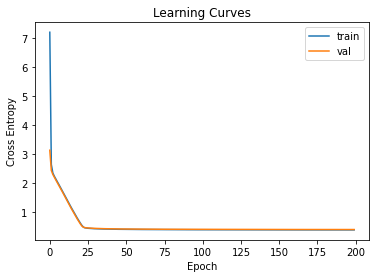

In [164]:
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(fit_model.history['loss'], label='train')
pyplot.plot(fit_model.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [165]:
df_no_pre5 = df_no_pre2.drop(columns=["CholCheck", "HvyAlcoholConsump"])
df_no_pre5

,Diabetes_012,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,AnyHealthcare,NoDocbcCost,GenHlth,DiffWalk,Sex,Age,Education,Income,MentalHealth,PhysicalHealth
0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,5.0,1.0,0.0,9.0,4.0,3.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,7.0,6.0,1.0,1.0,1.0
2,0.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,5.0,1.0,0.0,9.0,4.0,8.0,6.0,6.0
3,0.0,1.0,0.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,11.0,3.0,6.0,1.0,1.0
4,0.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,11.0,5.0,4.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,1.0,5.0,6.0,7.0,1.0,1.0
253676,2.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,1.0,0.0,11.0,2.0,4.0,1.0,1.0
253677,0.0,0.0,0.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,5.0,2.0,1.0,1.0
253678,0.0,1.0,0.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,1.0,7.0,5.0,1.0,1.0,1.0


In [166]:
# Split our preprocessed data into our features and target arrays
y = df_no_pre5["Diabetes_012"].values
X = df_no_pre5.drop(columns=['Diabetes_012']).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [167]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 50
hidden_nodes_layer2 = 20
hidden_nodes_layer3 = 20
hidden_nodes_layer4 = 10
nn22 = tf.keras.models.Sequential()

# First hidden layer
nn22.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn22.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Dropout
nn22.add(tf.keras.layers.Dense(5, input_dim=5, kernel_initializer='ones', kernel_regularizer=tf.keras.regularizers.L1(0.01),
    activity_regularizer=tf.keras.regularizers.L2(0.01)))

# Third hidden layer
nn22.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Dropout
nn22.add(tf.keras.layers.Dense(5, input_dim=5, kernel_initializer='ones', kernel_regularizer=tf.keras.regularizers.L1(0.01),
    activity_regularizer=tf.keras.regularizers.L2(0.01)))

# Fourth hidden layer
nn22.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
nn22.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn22.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_100 (Dense)            (None, 50)                1000      
_________________________________________________________________
dense_101 (Dense)            (None, 20)                1020      
_________________________________________________________________
dense_102 (Dense)            (None, 5)                 105       
_________________________________________________________________
dense_103 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_104 (Dense)            (None, 5)                 105       
_________________________________________________________________
dense_105 (Dense)            (None, 10)                60        
_________________________________________________________________
dense_106 (Dense)            (None, 1)               

In [168]:
nn22.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
fit_model = nn22.fit(X_train_scaled,y_train, batch_size = 32, epochs=200, callbacks=[callback], validation_split=0.2)

Epoch 1/200
4670/4670 [==============================] - 7s 1ms/step - loss: 11.5194 - accuracy: 0.8593 - val_loss: 3.8270 - val_accuracy: 0.8544
Epoch 2/200
4670/4670 [==============================] - 6s 1ms/step - loss: 2.8939 - accuracy: 0.8593 - val_loss: 2.5086 - val_accuracy: 0.8544
Epoch 3/200
4670/4670 [==============================] - 6s 1ms/step - loss: 2.3886 - accuracy: 0.8593 - val_loss: 2.3249 - val_accuracy: 0.8544
Epoch 4/200
4670/4670 [==============================] - 6s 1ms/step - loss: 2.2572 - accuracy: 0.8593 - val_loss: 2.2168 - val_accuracy: 0.8544
Epoch 5/200
4670/4670 [==============================] - 6s 1ms/step - loss: 2.1544 - accuracy: 0.8593 - val_loss: 2.1184 - val_accuracy: 0.8544
Epoch 6/200
4670/4670 [==============================] - 6s 1ms/step - loss: 2.0569 - accuracy: 0.8593 - val_loss: 2.0222 - val_accuracy: 0.8544
Epoch 7/200
4670/4670 [==============================] - 6s 1ms/step - loss: 1.9597 - accuracy: 0.8593 - val_loss: 1.9246 - val_a

4670/4670 [==============================] - 6s 1ms/step - loss: 0.4011 - accuracy: 0.7277 - val_loss: 0.4135 - val_accuracy: 0.7201
Epoch 114/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.4010 - accuracy: 0.7279 - val_loss: 0.4134 - val_accuracy: 0.7197
Epoch 115/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.4009 - accuracy: 0.7276 - val_loss: 0.4134 - val_accuracy: 0.7235
Epoch 116/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.4008 - accuracy: 0.7282 - val_loss: 0.4132 - val_accuracy: 0.7188
Epoch 117/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.4007 - accuracy: 0.7283 - val_loss: 0.4131 - val_accuracy: 0.7160
Epoch 118/200
4670/4670 [==============================] - 7s 1ms/step - loss: 0.4006 - accuracy: 0.7273 - val_loss: 0.4131 - val_accuracy: 0.7219
Epoch 119/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.4005 - accuracy: 0.7275 - val_loss: 0.4130 - val_ac

In [169]:
model_loss, model_accuracy = nn22.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1946/1946 - 1s - loss: 0.4056 - accuracy: 0.7244
Loss: 0.4056221544742584, Accuracy: 0.7244270443916321


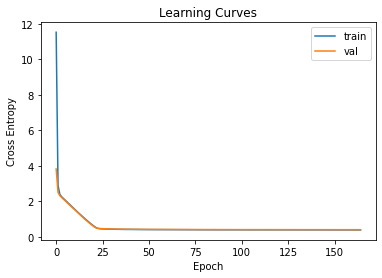

In [170]:
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(fit_model.history['loss'], label='train')
pyplot.plot(fit_model.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [172]:
df_no_pre6 = df_no_pre2.drop(columns=["CholCheck", "HvyAlcoholConsump", "AnyHealthcare", "Stroke"])
df_no_pre6.head()

,Diabetes_012,HighBP,HighChol,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,NoDocbcCost,GenHlth,DiffWalk,Sex,Age,Education,Income,MentalHealth,PhysicalHealth
0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,1.0,0.0,5.0,1.0,0.0,9.0,4.0,3.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,7.0,6.0,1.0,1.0,1.0
2,0.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,1.0,5.0,1.0,0.0,9.0,4.0,8.0,6.0,6.0
3,0.0,1.0,0.0,27.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,11.0,3.0,6.0,1.0,1.0
4,0.0,1.0,1.0,24.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,11.0,5.0,4.0,1.0,1.0


In [176]:
# Split our preprocessed data into our features and target arrays
y = df_no_pre6["Diabetes_012"].values
X = df_no_pre6.drop(columns=['Diabetes_012']).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [180]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 50
hidden_nodes_layer2 = 20
hidden_nodes_layer3 = 20
hidden_nodes_layer4 = 10
nn23 = tf.keras.models.Sequential()

# First hidden layer
nn23.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn23.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Dropout
nn23.add(tf.keras.layers.Dense(5, input_dim=5, kernel_initializer='ones', kernel_regularizer=tf.keras.regularizers.L1(0.01),
    activity_regularizer=tf.keras.regularizers.L2(0.01)))

# Third hidden layer
nn23.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Dropout
nn23.add(tf.keras.layers.Dense(5, input_dim=5, kernel_initializer='ones', kernel_regularizer=tf.keras.regularizers.L1(0.01),
    activity_regularizer=tf.keras.regularizers.L2(0.01)))

# Fourth hidden layer
nn23.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
nn23.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn23.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_114 (Dense)            (None, 50)                900       
_________________________________________________________________
dense_115 (Dense)            (None, 20)                1020      
_________________________________________________________________
dense_116 (Dense)            (None, 5)                 105       
_________________________________________________________________
dense_117 (Dense)            (None, 20)                120       
_________________________________________________________________
dense_118 (Dense)            (None, 5)                 105       
_________________________________________________________________
dense_119 (Dense)            (None, 10)                60        
_________________________________________________________________
dense_120 (Dense)            (None, 1)               

In [181]:
nn23.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
fit_model = nn23.fit(X_train_scaled,y_train, batch_size = 32, epochs=300, callbacks=[callback], validation_split=0.2)

Epoch 1/300
4670/4670 [==============================] - 6s 1ms/step - loss: 11.0415 - accuracy: 0.3800 - val_loss: 3.6158 - val_accuracy: 0.8544
Epoch 2/300
4670/4670 [==============================] - 6s 1ms/step - loss: 2.8085 - accuracy: 0.8593 - val_loss: 2.4754 - val_accuracy: 0.8544
Epoch 3/300
4670/4670 [==============================] - 6s 1ms/step - loss: 2.3752 - accuracy: 0.8593 - val_loss: 2.3211 - val_accuracy: 0.8544
Epoch 4/300
4670/4670 [==============================] - 6s 1ms/step - loss: 2.2560 - accuracy: 0.8593 - val_loss: 2.2179 - val_accuracy: 0.8544
Epoch 5/300
4670/4670 [==============================] - 6s 1ms/step - loss: 2.1564 - accuracy: 0.8593 - val_loss: 2.1214 - val_accuracy: 0.8544
Epoch 6/300
4670/4670 [==============================] - 6s 1ms/step - loss: 2.0602 - accuracy: 0.8593 - val_loss: 2.0250 - val_accuracy: 0.8544
Epoch 7/300
4670/4670 [==============================] - 6s 1ms/step - loss: 1.9621 - accuracy: 0.8593 - val_loss: 1.9259 - val_a

4670/4670 [==============================] - 6s 1ms/step - loss: 0.4012 - accuracy: 0.7277 - val_loss: 0.4133 - val_accuracy: 0.7187
Epoch 111/300
4670/4670 [==============================] - 6s 1ms/step - loss: 0.4011 - accuracy: 0.7275 - val_loss: 0.4132 - val_accuracy: 0.7188
Epoch 112/300
4670/4670 [==============================] - 6s 1ms/step - loss: 0.4010 - accuracy: 0.7268 - val_loss: 0.4132 - val_accuracy: 0.7244
Epoch 113/300
4670/4670 [==============================] - 6s 1ms/step - loss: 0.4009 - accuracy: 0.7283 - val_loss: 0.4130 - val_accuracy: 0.7178
Epoch 114/300
4670/4670 [==============================] - 6s 1ms/step - loss: 0.4008 - accuracy: 0.7272 - val_loss: 0.4129 - val_accuracy: 0.7194
Epoch 115/300
4670/4670 [==============================] - 6s 1ms/step - loss: 0.4007 - accuracy: 0.7267 - val_loss: 0.4130 - val_accuracy: 0.7254
Epoch 116/300
4670/4670 [==============================] - 6s 1ms/step - loss: 0.4007 - accuracy: 0.7280 - val_loss: 0.4128 - val_ac

In [182]:
model_loss, model_accuracy = nn23.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1946/1946 - 1s - loss: 0.4041 - accuracy: 0.7281
Loss: 0.4041045308113098, Accuracy: 0.728056788444519


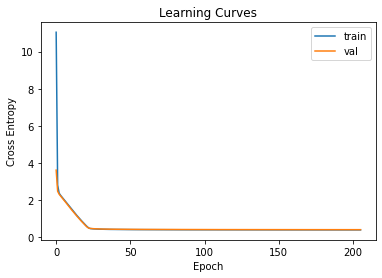

In [183]:
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(fit_model.history['loss'], label='train')
pyplot.plot(fit_model.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()